<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

- in prev chapter (need), used **pyplot(plt) interface** to use Matplotlib
- now using the "dialect" called **Object-Oriented (OO) Interface**"
- allows more nuanced ctrl over what is going on by allowing manipulation of various axes

# 1 Some nomenclature

- figure (full thing) vs axis (indiv math axes used for plotting)
- figure can have multiple axes
- recall: using twinx() to make new y-axis that shares same x-axis

# 2 Comparing the two ‘dialects’

### pyplot Interface

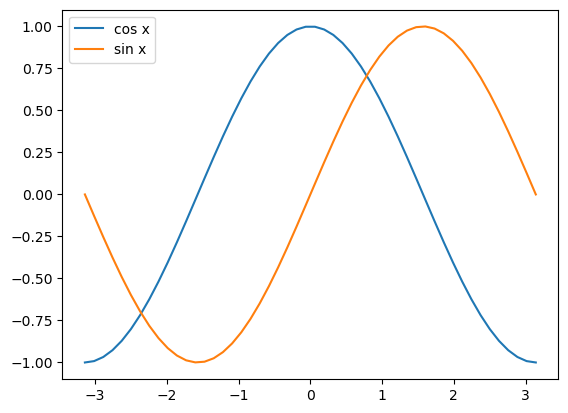

In [4]:
import numpy
from matplotlib import pyplot as plt
x = numpy.linspace(-numpy.pi, numpy.pi, num =50)
cosx = numpy.cos(x)
sinx = numpy.sin(x)
plt.plot(x,cosx, label="cos x")
plt.plot(x,sinx, label = "sin x")
plt.legend()

### OO Interface

- Explanation:
- starting by using subplots() to ask matplotlib to create figure and axis

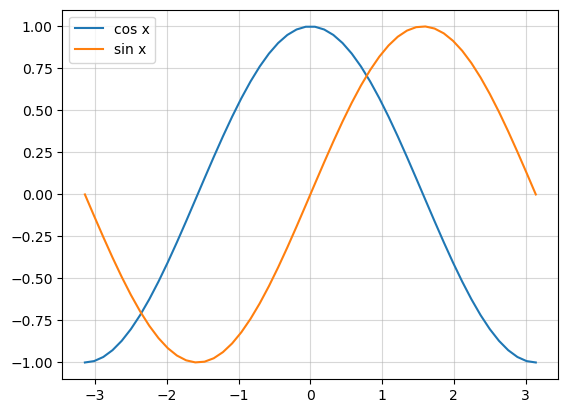

In [12]:
fig,ax = plt.subplots(nrows=1,ncols=1) #starting by using subplots() to ask matplotlib to create figure and axis
ax.plot(x, cosx, label="cos x")
ax.plot(x, sinx, label = "sin x")
ax.legend()
ax.grid(alpha=0.5)

# 3 What is OO ax, really?

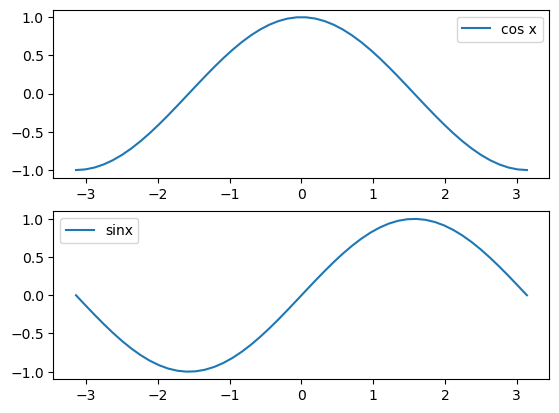

In [14]:
#tldr: allowing more rows and columns inside 1 figure
fig,ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(x,cosx,label="cos x")
ax[1].plot(x,sinx,label="sinx")

ax[0].legend()
ax[1].legend()

In [15]:
#MORE TECHNICAL STUFF
#ax is an array
type(ax)

numpy.ndarray

In [16]:
ax.shape #output is (2,) - ax has 2 "things"

(2,)

In [19]:
type(ax[0]) #this is a matplotlib axis

matplotlib.axes._axes.Axes

# 4 A complete OO example

- differences between OO and pyplot: setting labels
- OO: a.set_ylabel()
- pyplot:ylabel()

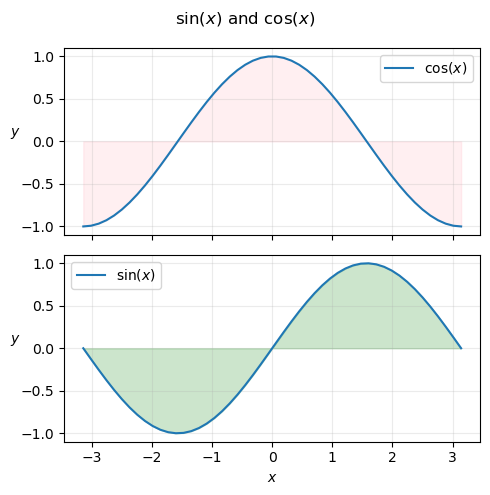

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5), #this is the horizontal vs vertical length. if increased, may stretch.
                       sharex=True) #sharing x axis

ax[0].plot(x, cosx, label=r'$\cos(x)$') #this gives the formatted equation ie. calculator font
ax[0].fill_between(x, 0, cosx, alpha=.25,color="pink") #fills btw graph and y = 0.

ax[1].plot(x, sinx, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sinx, alpha=.2, color="green")

for a in ax: #can index ax with 0 and 1 because it is a numpy array with 2 axes
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$') #this is the bottom one - adding x axis to just the bottom one will do

fig.suptitle(r'$\sin(x)$ and $\cos(x)$') #upper title
fig.tight_layout() #decreases the gap btw top and bottom graph

# 5 Multiple rows and columns

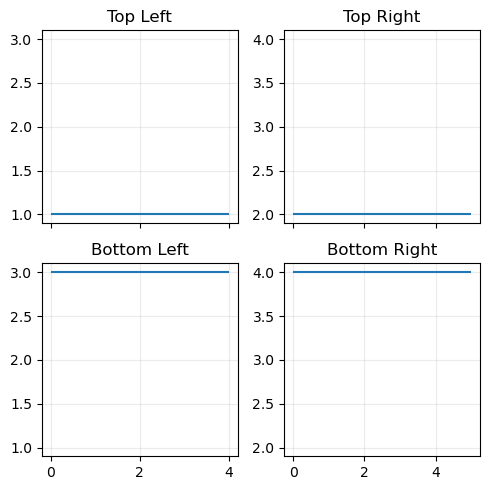

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col') #the columns share x and y but not the rows

# accessing the axes and improve readabilty -  this helps give each of the axes (squares) a name
top_left, top_right, bottom_left, bottom_right = ax.flatten()


top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4) #horizontal lines
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

(2, 2)
[[<Axes: title={'center': 'Top Left'}>
  <Axes: title={'center': 'Top Right'}>]
 [<Axes: title={'center': 'Bottom Left'}>
  <Axes: title={'center': 'Bottom Right'}>]]


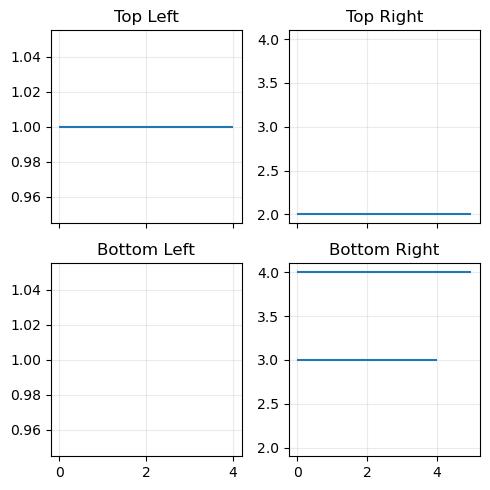

In [52]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col') #the columns share x and y but not the rows

# accessing the axes and improve readabilty -  this helps give each of the axes (squares) a name. also flattens the 2D array into 1D
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

#tweaking each axis after flattening. this part determines where the lines are plotted
top_left=ax[0,0]
top_right=ax[0,1]
bottom_left=ax[1,1] #this gives 2 lines in the bottom right, and the graph in bottom left is empty

top_left.hlines(y=1, xmin=0, xmax=4) #drawing horizontal lines
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

print(ax.shape) #therefore, ax is organised as a 2 x 2 array
print(ax)

## 5.1 Sharing axes

- Different ways of sharing axes (all these have been included in the earlier figures)
- 1. True: makes all axes use the same range. eg. sharex=True) #sharing x axis
  2. col or row: sharex = "col", sharey = "row", etc

(2, 2)
[[<Axes: title={'center': 'Top Left'}>
  <Axes: title={'center': 'Top Right'}>]
 [<Axes: title={'center': 'Bottom Left'}>
  <Axes: title={'center': 'Bottom Right'}>]]


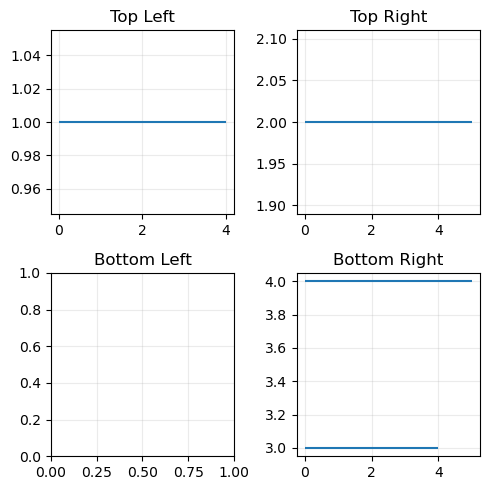

In [54]:
#has been implemented in the above figure. example if i DON'T do this:

fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5)) #matplotlib will autoscale the axes

# accessing the axes and improve readabilty -  this helps give each of the axes (squares) a name. also flattens the 2D array into 1D
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

#tweaking each axis after flattening. this part determines where the lines are plotted
top_left=ax[0,0]
top_right=ax[0,1]
bottom_left=ax[1,1] #this gives 2 lines in the bottom right, and the graph in bottom left is empty

top_left.hlines(y=1, xmin=0, xmax=4) #drawing horizontal lines
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

print(ax.shape) #therefore, ax is organised as a 2 x 2 array
print(ax)

## 5.2 Accessing all axes using for loop

In [57]:
# applying changes to all axes using a for loop
# instead of top_left.grid(alpha = .25), just type:
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

### Data

### A quick helper function (get_plot_data() to read data from files several times)

In [71]:
#downloaded 2 csv files.

def get_plot_data(): #this tells the code to read data from the files several times, use get_plot_data()
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = numpy.loadtxt(filename, skiprows=1) #skipping first row because it is the header row

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = numpy.loadtxt(filename, skiprows=1)

    #this code extracts data from 2 files

    return data

### The histogram

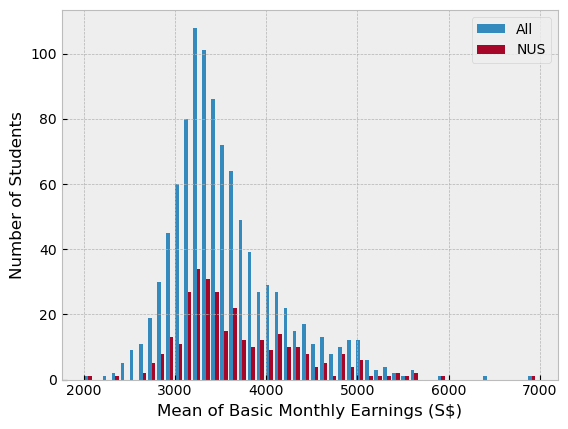

In [69]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Monthly Earnings (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 6.2 Scatter plots

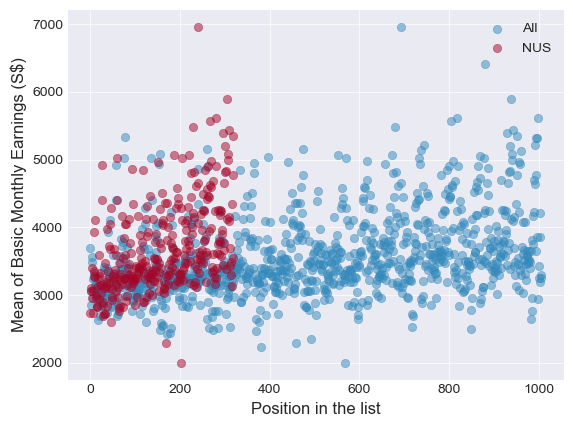

In [74]:
#need some values for x so use range() with len() to make a list [0,1,2,3...] appropriate to dataset

plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers)) #for all these numbers, generate the len() and set the range()
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Monthly Earnings (S$)')
plt.legend()

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

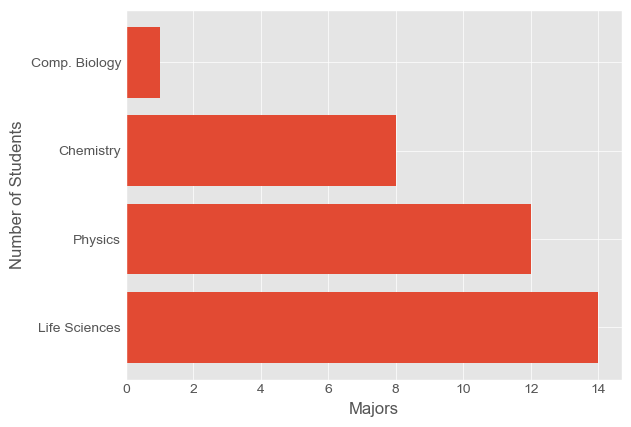

In [77]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}

majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.barh(majors, numbers) #keys, values. bar() for vertical bars, barh() for horizontal
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

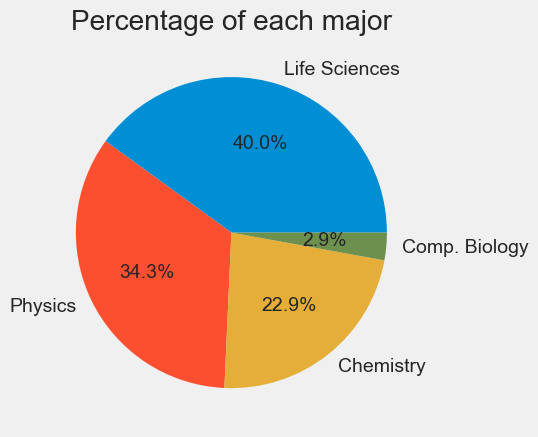

In [84]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=0 # starting at 0 starts from the east portion (3 o clock) and moves counterclockwise               
        )
plt.title('Percentage of each major')